# Importing the Libraries

In [1]:
import numpy as np # used for working with arrays
import pandas as pd # used for data analysis
import seaborn as sns # used for data visualization
import matplotlib.pyplot as plt # used for data visualization from plots, graphs and charts
import warnings 
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
data = pd.read_csv('pronostico_dataset.csv',delimiter=';') # reading the data 
data # original data
# we have 5 features - ID, age, systolic_bp, diastolic_bp, cholestrol
# we have 1 target variable - prognosis{retinopathy,no_retinopathy}

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...,...
5995,5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,5998,63.468956,106.809289,88.060631,106.052213,retinopathy


# EDA :- Exploratory Data Analysis

## 1. Basic Information about the Data

In [3]:
data.info() # some information about the data
# there are no null values with 6000 records in each columns
# ID datatype is integer type and other features are having float datatype
# target variable i.e. prognosis is having object datatype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   age           6000 non-null   float64
 2   systolic_bp   6000 non-null   float64
 3   diastolic_bp  6000 non-null   float64
 4   cholesterol   6000 non-null   float64
 5   prognosis     6000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 281.4+ KB


In [4]:
data.describe() # descriptive statistics summary of a given dataframe

,ID,age,systolic_bp,diastolic_bp,cholesterol
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2999.500000,60.464121,100.694822,90.505547,100.628255
std,1732.195139,8.564392,10.669267,9.648200,10.433915
min,0.000000,35.164761,69.675429,62.807105,69.967453
25%,1499.750000,54.371941,93.267420,83.641788,93.202373
50%,2999.500000,59.831159,100.119926,89.912429,100.060637
75%,4499.250000,65.809652,107.439501,96.682405,107.250829
max,5999.000000,103.279497,151.699660,133.456382,148.233544


## 2. Checking the Duplicate values

In [5]:
data.duplicated().sum() # checking duplicate values

0

## 3. Checking the Unique Values

In [6]:
data['prognosis'].unique() # classes in target variable

array(['retinopathy', 'no_retinopathy'], dtype=object)

## 4. Finding the Null Values

In [7]:
data.isnull().sum() # checking null values

ID              0
age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

## 5. Visualize the Unique Counts of "Target Vairable"

In [8]:
data['prognosis'].value_counts() # count of each class in target variable

retinopathy       3087
no_retinopathy    2913
Name: prognosis, dtype: int64

In [9]:
data['prognosis'].value_counts(normalize=True) 
# percentage of retinopathy - 51.45%
# percentage of no_retinopathy - 48.55%

retinopathy       0.5145
no_retinopathy    0.4855
Name: prognosis, dtype: float64

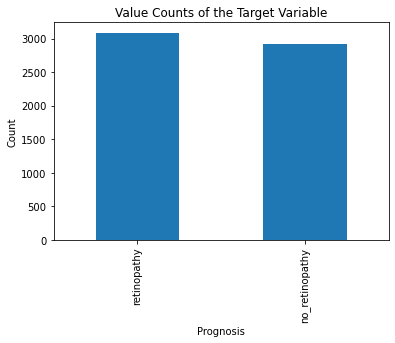

In [10]:
data['prognosis'].value_counts().plot(kind='bar')
plt.title("Value Counts of the Target Variable")
plt.xlabel("Prognosis")
plt.ylabel("Count")
plt.show()

## 6. Encoding the Target Variable

In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
data['prognosis'] = label_encoder.fit_transform(data['prognosis'])
# Label encoding refers to converting the labels into numeric from
# so as to convert them into the machine-readable form.

In [12]:
data['prognosis'].unique() 
# after encoding the target class we have 2 classes 

array([1, 0])

### 1 -> Retinopathy  0 -> No Retinopathy 

## 7. Visualizing the Boxplots

<AxesSubplot:xlabel='cholesterol'>

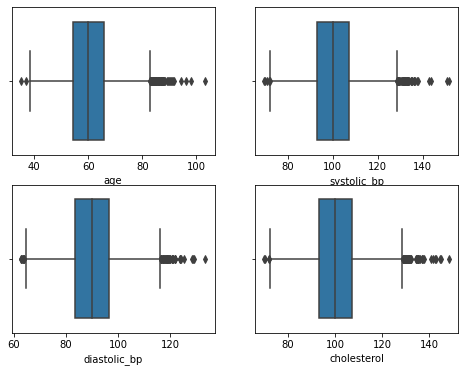

In [13]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.boxplot(x=data['age'],data=data)
plt.subplot(2,2,2)
sns.boxplot(x=data['systolic_bp'],data=data)
plt.subplot(2,2,3)
sns.boxplot(x=data['diastolic_bp'],data=data)
plt.subplot(2,2,4)
sns.boxplot(x=data['cholesterol'],data=data)

## 8. Handling the Outliers

##### We will use z score to check the outliers and to handle it
##### If z score is more than 3 that means that data point is an outlier
##### We will drop those records from our dataset

In [14]:
from scipy.stats import zscore

In [15]:
z_score = np.abs(zscore(data.iloc[:,1:6]))

In [16]:
z_score

array([[1.95385881, 1.44408831, 1.08668383, 1.98131478, 0.97140856],
       [0.35799212, 0.12326958, 0.58598051, 0.93492889, 0.97140856],
       [0.9972193 , 0.9987116 , 2.00521155, 0.01916893, 0.97140856],
       ...,
       [0.57240332, 0.21309482, 1.26379482, 1.94072729, 0.97140856],
       [0.3508814 , 0.5731393 , 0.25342752, 0.51988249, 0.97140856],
       [0.23853111, 0.35563406, 0.37600957, 0.7665241 , 1.02943297]])

In [17]:
np.shape(np.where(z_score>3))

(2, 95)

In [18]:
data_new = data[(z_score<3).all(axis=1)]

In [19]:
data_new

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,1
1,1,63.529850,99.379736,84.852361,110.382411,1
2,2,69.003986,111.349455,109.850616,100.828246,1
3,3,82.638210,95.056128,79.666851,87.066303,1
4,4,78.346286,109.154591,90.713220,92.511770,1
...,...,...,...,...,...,...
5995,5995,49.611850,94.857639,86.615671,107.643986,0
5996,5996,63.099686,100.039527,93.515186,104.971404,1
5997,5997,55.562243,98.421446,102.697875,120.875951,1
5998,5998,63.468956,106.809289,88.060631,106.052213,1


## 9. Dropping ID column

In [20]:
data_new = data_new.drop(columns='ID',axis=1)

In [21]:
data_new

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,1
1,63.529850,99.379736,84.852361,110.382411,1
2,69.003986,111.349455,109.850616,100.828246,1
3,82.638210,95.056128,79.666851,87.066303,1
4,78.346286,109.154591,90.713220,92.511770,1
...,...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986,0
5996,63.099686,100.039527,93.515186,104.971404,1
5997,55.562243,98.421446,102.697875,120.875951,1
5998,63.468956,106.809289,88.060631,106.052213,1


## 10. Checking for Multicollinearity 

In [22]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [23]:
model = smf.ols('prognosis~age+systolic_bp+diastolic_bp+cholesterol', data = data_new).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              prognosis   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     609.0
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:51:43   Log-Likelihood:                -3265.7
No. Observations:                5907   AIC:                             6541.
Df Residuals:                    5902   BIC:                             6575.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.0980      0.080    -38.920      0.000      -3.254      -2.942
age              0.0226      0.001     34.339      0.000       0.021       0.024
systolic_bp      0.0119      0.001     19.829      0.000       0.011       0.013
diastolic_bp -8.688e-05      0.001     -0.132      0.895      -0.001       0.001
cholesterol      0.0106      0.001     17.359      0.000       0.009       0.012
==============================================================================
Omnibus:                     1411.062   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.227
Skew:                          -0.039   Prob(JB):                     1.70e-55
Kurtosis:                       1.991   Cond. No.                     2.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_age = smf.ols('age~systolic_bp+diastolic_bp+cholesterol',data=data_new).fit().rsquared
vif_age = 1/(1-rsq_age)
rsq_sys = smf.ols('systolic_bp~age+diastolic_bp+cholesterol',data=data_new).fit().rsquared
vif_sys = 1/(1-rsq_sys)
rsq_dias = smf.ols('diastolic_bp~age+systolic_bp+cholesterol',data=data_new).fit().rsquared
vif_dias = 1/(1-rsq_dias)
rsq_choles = smf.ols('cholesterol~age+systolic_bp+diastolic_bp',data=data_new).fit().rsquared
vif_choles = 1/(1-rsq_choles)

data1={'Features':['Age','Systolic_BP','Diastolic_BP','Cholesterol'],'VIF':[vif_age,vif_sys,vif_dias,vif_choles]}
Vif_frame = pd.DataFrame(data1)
Vif_frame

,Features,VIF
0,Age,1.000348
1,Systolic_BP,1.294727
2,Diastolic_BP,1.283326
3,Cholesterol,1.282291


#### From the table we can see there is no much multicollinearity amongst variable
#### Therefore, we can consider all the variables

## 11. Correlation Plot

In [26]:
data_new.corr()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
age,1.000000,0.012472,-0.006247,-0.003919,0.378367
systolic_bp,0.012472,1.000000,0.397581,0.396785,0.336547
diastolic_bp,-0.006247,0.397581,1.000000,0.387465,0.177665
cholesterol,-0.003919,0.396785,0.387465,1.000000,0.311206
prognosis,0.378367,0.336547,0.177665,0.311206,1.000000


<AxesSubplot:>

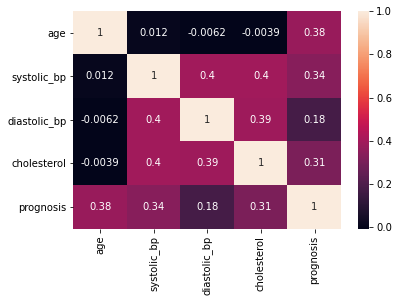

In [27]:
sns.heatmap(data_new.corr(),annot=True)

##### Analysis :- Near to 1 = More Correlated, Near to 0 = No Correlated
###### 1. Age is not depending on any other feature and is correlated to target variable with .38(highest)
###### 2. Systolic_bp correlated with every other feature except age and is correlated to target variable with .34
###### 3. Diastolic_bp correlated with every other feature except age and is correlated to target variable with .18 (lowest)
###### 4. Cholesterol correlated with every other feature except age and is correlated to target variable with .31

## 12. Checking Distribution of data in each feature

<AxesSubplot:xlabel='age', ylabel='Density'>

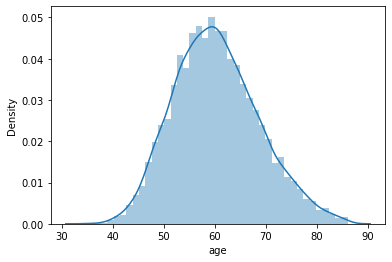

In [28]:
sns.distplot(data_new['age'])

<AxesSubplot:xlabel='systolic_bp', ylabel='Density'>

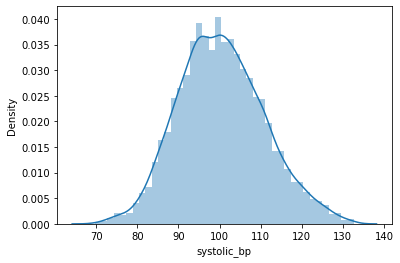

In [29]:
sns.distplot(data_new['systolic_bp'])

<AxesSubplot:xlabel='diastolic_bp', ylabel='Density'>

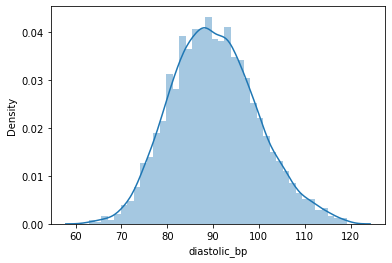

In [30]:
sns.distplot(data_new['diastolic_bp'])

<AxesSubplot:xlabel='cholesterol', ylabel='Density'>

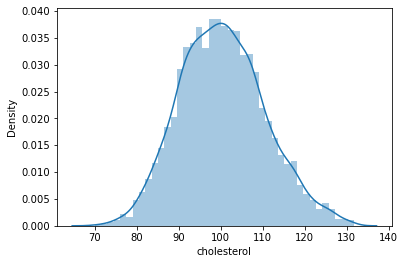

In [31]:
sns.distplot(data_new['cholesterol'])

## 13. Splitting data into features and target

In [32]:
X = data_new.drop(columns='prognosis',axis=1)
Y = data_new['prognosis']

In [33]:
X

,age,systolic_bp,diastolic_bp,cholesterol
0,77.196340,85.288742,80.021878,79.957109
1,63.529850,99.379736,84.852361,110.382411
2,69.003986,111.349455,109.850616,100.828246
3,82.638210,95.056128,79.666851,87.066303
4,78.346286,109.154591,90.713220,92.511770
...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986
5996,63.099686,100.039527,93.515186,104.971404
5997,55.562243,98.421446,102.697875,120.875951
5998,63.468956,106.809289,88.060631,106.052213


In [34]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    1
5997    1
5998    1
5999    0
Name: prognosis, Length: 5907, dtype: int64

#### Data in all the features are normally distributed.

# Model Building

## 1. Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import plot_roc_curve

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,shuffle=True)

In [37]:
classifier_LR = LogisticRegression(random_state=0)
classifier_LR.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [38]:
y_pred = classifier_LR.predict(x_test)
cm_LR = confusion_matrix(y_test,y_pred)
print(cm_LR)

[[671 184]
 [257 661]]


In [39]:
acc_LR = ac(y_test,y_pred)
print(acc_LR)

0.751269035532995


In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       855
           1       0.78      0.72      0.75       918

    accuracy                           0.75      1773
   macro avg       0.75      0.75      0.75      1773
weighted avg       0.75      0.75      0.75      1773



In [41]:
fpr, tpr, thresholds = roc_curve(y_test, classifier_LR.predict_proba(x_test)[:,1])
auc = roc_auc_score(y_test,y_pred)

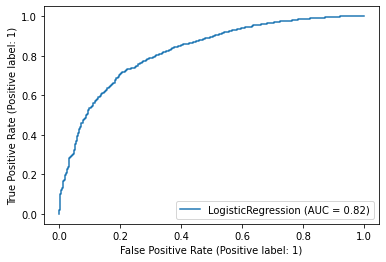

In [42]:
plot_roc_curve(classifier_LR,X=x_test,y=y_test)

In [43]:
auc_LR = roc_auc_score(y_test,y_pred)
auc_LR

0.7524194473110881

In [44]:
f1_score_LR = f1_score(y_test,y_pred)
f1_score_LR

0.7498581962563811

In [45]:
recall_LR = recall_score(y_test,y_pred)
print(f"Recall score using Logistic Regression is {recall_LR}")

Recall score using Logistic Regression is 0.7200435729847494


In [46]:
precision_LR = precision_score(y_test,y_pred)
print(f"Precision score using Logistic Regression is {precision_LR}")

Precision score using Logistic Regression is 0.7822485207100591


## 2. K-Nearest Neighbors (KNN)

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
classifier_KNN= KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p=2)
classifier_KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [49]:
y_pred = classifier_KNN.predict(x_test)

In [50]:
cm_KNN = confusion_matrix(y_test,y_pred)
print(cm_KNN)

[[608 247]
 [264 654]]


In [51]:
acc_KNN = ac(y_test,y_pred)
print(acc_KNN)

0.7117879300620418


In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70       855
           1       0.73      0.71      0.72       918

    accuracy                           0.71      1773
   macro avg       0.71      0.71      0.71      1773
weighted avg       0.71      0.71      0.71      1773



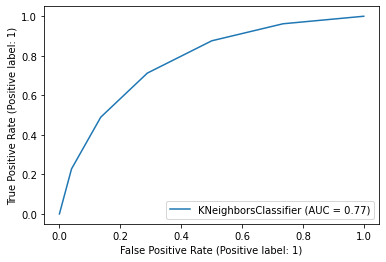

In [53]:
plot_roc_curve(classifier_KNN,X=x_test,y=y_test)

In [54]:
auc_KNN = roc_auc_score(y_test,y_pred)
auc_KNN

0.7117647058823531

In [55]:
f1_score_KNN = f1_score(y_test,y_pred)
f1_score_KNN

0.7190764156129741

In [56]:
recall_KNN = recall_score(y_test,y_pred)
print(f"Recall score using KNN is {recall_KNN}")

Recall score using KNN is 0.7124183006535948


In [57]:
precision_KNN = precision_score(y_test,y_pred)
print(f"Precision score using KNN is {precision_KNN}")

Precision score using KNN is 0.7258601553829079


## 3. Support Vector Machine

In [58]:
from sklearn.svm import SVC

In [59]:
classifier_SVC = SVC(kernel = 'rbf', gamma=0.001,C=0.1)
classifier_SVC.fit(x_train, y_train)

SVC(C=0.1, gamma=0.001)

In [60]:
y_pred = classifier_SVC.predict(x_test)

In [61]:
cm_SVC = confusion_matrix(y_test, y_pred)
cm_SVC

array([[637, 218],
       [223, 695]])

In [62]:
acc_SVC = ac(y_test, y_pred)
acc_SVC

0.751269035532995

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       855
           1       0.76      0.76      0.76       918

    accuracy                           0.75      1773
   macro avg       0.75      0.75      0.75      1773
weighted avg       0.75      0.75      0.75      1773



In [64]:
auc_SVC = roc_auc_score(y_test,y_pred)
auc_SVC

0.7510549248939342

In [65]:
f1_score_SVC = f1_score(y_test,y_pred)
f1_score_SVC

0.7591480065537958

In [66]:
recall_SVC = recall_score(y_test,y_pred)
print(f"Recall score using Support Vector Machine is {recall_SVC}")

Recall score using Support Vector Machine is 0.7570806100217865


In [67]:
precision_SVC = precision_score(y_test,y_pred)
print(f"Precision score using Support Vector Machine is {precision_SVC}")

Precision score using Support Vector Machine is 0.7612267250821467


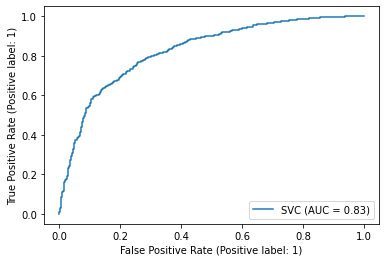

In [68]:
plot_roc_curve(classifier_SVC,X=x_test,y=y_test)

## 4. Naive Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
classifier_NB = GaussianNB()
classifier_NB.fit(x_train, y_train)

GaussianNB()

In [71]:
y_pred = classifier_NB.predict(x_test)

In [72]:
cm_NB = confusion_matrix(y_test, y_pred)
print(cm_NB)

[[664 191]
 [269 649]]


In [73]:
acc_NB = ac(y_test, y_pred)
print(acc_NB)

0.7405527354765934


In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       855
           1       0.77      0.71      0.74       918

    accuracy                           0.74      1773
   macro avg       0.74      0.74      0.74      1773
weighted avg       0.74      0.74      0.74      1773



In [75]:
auc_NB = roc_auc_score(y_test,y_pred)
auc_NB

0.7417899323472079

In [76]:
f1_score_NB = f1_score(y_test,y_pred)
f1_score_NB

0.7383390216154722

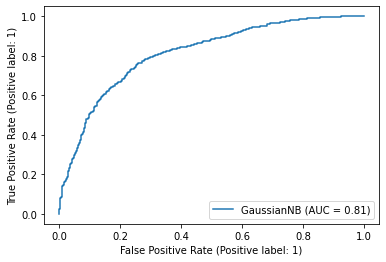

In [77]:
plot_roc_curve(classifier_NB,X=x_test,y=y_test)

In [78]:
recall_NB = recall_score(y_test,y_pred)
print(f"Recall score using Naive Bayes is {recall_NB}")

Recall score using Naive Bayes is 0.7069716775599129


In [79]:
precision_NB = precision_score(y_test,y_pred)
print(f"Precision score using Naive Bayes is {precision_NB}")

Precision score using Naive Bayes is 0.7726190476190476


## 5. Decision Tree Classification

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
classifier_DT = DecisionTreeClassifier(criterion='gini', random_state=0,max_depth=4,max_features=4)
classifier_DT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features=4, random_state=0)

In [82]:
y_pred = classifier_DT.predict(x_test)

In [83]:
cm_DT = confusion_matrix(y_test,y_pred)
print(cm_DT)

[[621 234]
 [240 678]]


In [84]:
acc_DT= ac(y_test, y_pred)
print(acc_DT)

0.7326565143824028


In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72       855
           1       0.74      0.74      0.74       918

    accuracy                           0.73      1773
   macro avg       0.73      0.73      0.73      1773
weighted avg       0.73      0.73      0.73      1773



In [86]:
auc_DT = roc_auc_score(y_test,y_pred)
auc_DT

0.7324389404884761

In [87]:
f1_score_DT = f1_score(y_test,y_pred)
f1_score_DT

0.740983606557377

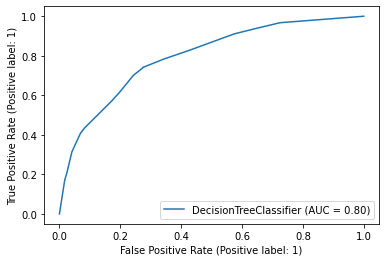

In [88]:
plot_roc_curve(classifier_DT,X=x_test,y=y_test)

In [89]:
recall_DT = recall_score(y_test,y_pred)
print(f"Recall score using Decision Tree is {recall_DT}")

Recall score using Decision Tree is 0.738562091503268


In [90]:
precision_DT = precision_score(y_test,y_pred)
print(f"Precision score using Decision Tree is {precision_DT}")

Precision score using Decision Tree is 0.743421052631579


## 6. Random Forest Classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
classifier_RF = RandomForestClassifier(n_estimators = 125, criterion = 'gini',class_weight='balanced',max_depth=5,max_features=4,min_samples_split=11)
classifier_RF.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=4,
                       min_samples_split=11, n_estimators=125)

In [93]:
y_pred = classifier_RF.predict(x_test)

In [94]:
cm_RF = confusion_matrix(y_test, y_pred)
print(cm_RF)

[[631 224]
 [237 681]]


In [95]:
acc_RF = ac(y_test, y_pred)
acc_RF

0.7399887196841511

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73       855
           1       0.75      0.74      0.75       918

    accuracy                           0.74      1773
   macro avg       0.74      0.74      0.74      1773
weighted avg       0.74      0.74      0.74      1773



In [97]:
auc_RF = roc_auc_score(y_test,y_pred)
auc_RF

0.7399208806329549

In [98]:
f1_score_RF = f1_score(y_test,y_pred)
f1_score_RF

0.7471201316511245

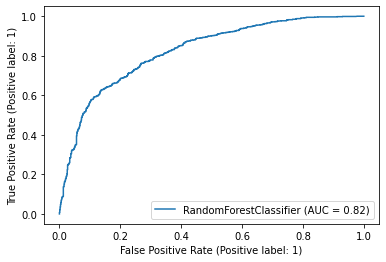

In [99]:
plot_roc_curve(classifier_RF,X=x_test,y=y_test)

In [100]:
recall_RF = recall_score(y_test,y_pred)
print(f"Recall score using Random Forest is {recall_RF}")

Recall score using Random Forest is 0.7418300653594772


In [101]:
precision_RF = precision_score(y_test,y_pred)
print(f"Precision score using Random Forest is {precision_RF}")

Precision score using Random Forest is 0.7524861878453039


## 7. XGBoost Classifier

In [102]:
from xgboost import XGBClassifier

In [103]:
classifier_XG=XGBClassifier(n_estimators=200,gamma=6)
classifier_XG.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=6, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [104]:
y_pred = classifier_XG.predict(x_test)

In [105]:
cm_XG = confusion_matrix(y_test, y_pred)
print(cm_XG)

[[618 237]
 [229 689]]


In [106]:
acc_XG = ac(y_test, y_pred)
acc_XG

0.7371686407219402

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       855
           1       0.74      0.75      0.75       918

    accuracy                           0.74      1773
   macro avg       0.74      0.74      0.74      1773
weighted avg       0.74      0.74      0.74      1773



In [108]:
auc_XG = roc_auc_score(y_test,y_pred)
auc_XG

0.736675839926614

In [109]:
f1_score_XG = f1_score(y_test,y_pred)
f1_score_XG

0.7472885032537961

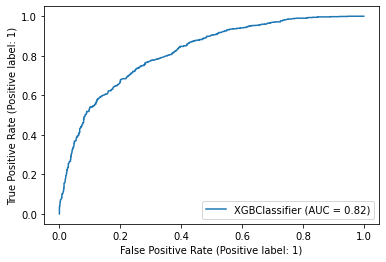

In [110]:
plot_roc_curve(classifier_XG,X=x_test,y=y_test)

In [111]:
recall_XG = recall_score(y_test,y_pred)
print(f"Recall score using XGBoost is {recall_XG}")

Recall score using XGBoost is 0.7505446623093682


In [112]:
precision_XG = precision_score(y_test,y_pred)
print(f"Precision score using XGBoost is {precision_XG}")

Precision score using XGBoost is 0.744060475161987


# Finding the Best Model Based on Metrics and comparing them based on their performance 

In [113]:
model_accuracy = {'Model':pd.Series(['Logistic Regression','KNN','SVM','Naive Bayes','Decision Tree','Random Forest','XGBoost']),
                  'Test Accuracy':pd.Series([acc_LR,acc_KNN,acc_SVC,acc_NB,acc_DT,acc_RF,acc_XG]),
                  'AUC Score':pd.Series([auc_LR,auc_KNN,auc_SVC,auc_NB,auc_DT,auc_RF,auc_XG]),
                  'F1 Score':pd.Series([f1_score_LR,f1_score_KNN,f1_score_SVC,f1_score_NB,f1_score_DT,f1_score_RF,f1_score_XG]),
                  'Recall Score':pd.Series([recall_LR,recall_KNN,recall_SVC,recall_NB,recall_DT,recall_RF,recall_XG]),
                  'Precision Score':pd.Series([precision_LR,precision_KNN,precision_SVC,precision_NB,precision_DT,precision_RF,precision_XG])}

metrics_table=pd.DataFrame(model_accuracy)
metrics_table.sort_values(['AUC Score','F1 Score'],ascending=False)

,Model,Test Accuracy,AUC Score,F1 Score,Recall Score,Precision Score
0,Logistic Regression,0.751269,0.752419,0.749858,0.720044,0.782249
2,SVM,0.751269,0.751055,0.759148,0.757081,0.761227
3,Naive Bayes,0.740553,0.741790,0.738339,0.706972,0.772619
5,Random Forest,0.739989,0.739921,0.747120,0.741830,0.752486
6,XGBoost,0.737169,0.736676,0.747289,0.750545,0.744060
4,Decision Tree,0.732657,0.732439,0.740984,0.738562,0.743421
1,KNN,0.711788,0.711765,0.719076,0.712418,0.725860


# Deploying the Model - SVM

In [114]:
from pickle import dump
from pickle import load

In [115]:
dump(classifier_SVC,open('SVC.sav','wb'))

In [116]:
loaded_model = load(open('SVC.sav','rb'))
result = loaded_model.score(X,Y)
print(result)

0.7486033519553073


In [ ]:
!streamlit run appupdated.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.29.152:8501

[1]
